In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (6, 6)
plt.rcParams["image.cmap"] = "gray"

In [3]:
# Physical parameters
wavelength = 0.193   # 193 nm
NA = 1.35             # NA

In [4]:
# Simulation grid
N = 512          # grid size
L = 2.0         # normalized simulation window

x = np.linspace(-L/2, L/2, N)
y = np.linspace(-L/2, L/2, N)
X, Y = np.meshgrid(x, y)

dx = x[1] - x[0]
print(dx)

0.003913894324853229


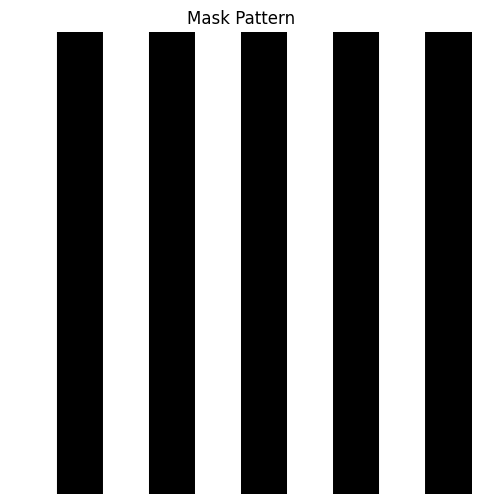

In [16]:
# Mask definition
CD = 0.2   # linewidth = 200 nm
Pitch = 0.4  #200 nm line+200nm space

mask = np.zeros((N, N))
mask[((X + Pitch/2) % Pitch) < CD] = 1.0 #If the position X (modulo Pitch) is less than CD, we make it transparent. We add Pitch/2 to shift the lines so one line is perfectly centered at 0'''

plt.imshow(mask)
plt.title("Mask Pattern")
plt.axis("off")
plt.show()


In [6]:
# Spatial frequency coordinates
fx = np.fft.fftfreq(N, d=dx)
fy = np.fft.fftfreq(N, d=dx)

FX, FY = np.meshgrid(fx, fy)
print(FX,FY)

[[ 0.          0.49902344  0.99804688 ... -1.49707031 -0.99804688
  -0.49902344]
 [ 0.          0.49902344  0.99804688 ... -1.49707031 -0.99804688
  -0.49902344]
 [ 0.          0.49902344  0.99804688 ... -1.49707031 -0.99804688
  -0.49902344]
 ...
 [ 0.          0.49902344  0.99804688 ... -1.49707031 -0.99804688
  -0.49902344]
 [ 0.          0.49902344  0.99804688 ... -1.49707031 -0.99804688
  -0.49902344]
 [ 0.          0.49902344  0.99804688 ... -1.49707031 -0.99804688
  -0.49902344]] [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.49902344  0.49902344  0.49902344 ...  0.49902344  0.49902344
   0.49902344]
 [ 0.99804688  0.99804688  0.99804688 ...  0.99804688  0.99804688
   0.99804688]
 ...
 [-1.49707031 -1.49707031 -1.49707031 ... -1.49707031 -1.49707031
  -1.49707031]
 [-0.99804688 -0.99804688 -0.99804688 ... -0.99804688 -0.99804688
  -0.99804688]
 [-0.49902344 -0.49902344 -0.49902344 ... -0.49902344 -0.49902344
  -0.49902344]]


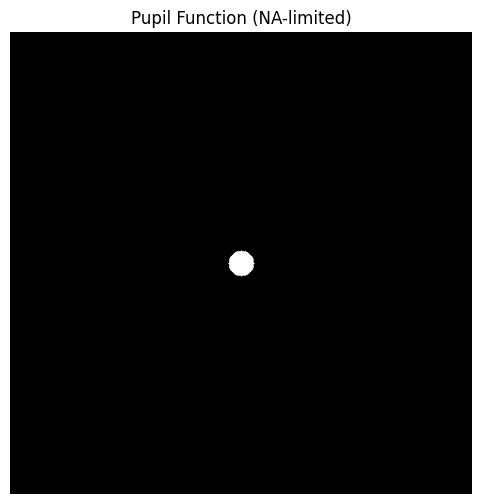

In [7]:
# Pupil function

freq_radius = np.sqrt(FX**2 + FY**2)
f_cutoff = NA/wavelength 

pupil = np.zeros_like(freq_radius)
pupil[freq_radius <= f_cutoff] = 1.0

plt.imshow(np.fft.fftshift(pupil))
plt.title("Pupil Function (NA-limited)")
plt.axis("off")
plt.show()


In [8]:
# Forward optical propagation
mask_fft = np.fft.fft2(mask)
filtered_fft = mask_fft * pupil
field = np.fft.ifft2(filtered_fft)


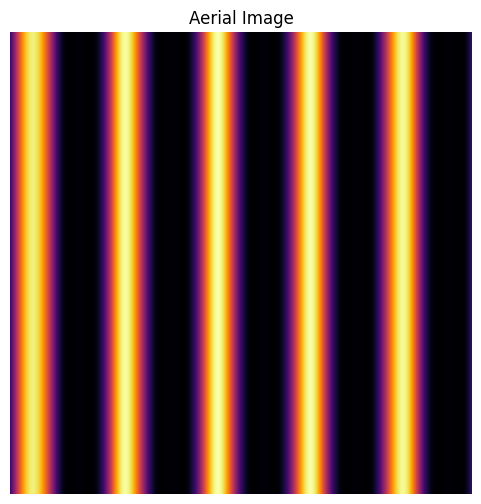

In [9]:
# Aerial image
intensity = np.abs(field)**2
intensity /= intensity.max()

plt.imshow(intensity, cmap="inferno")
plt.title("Aerial Image")
plt.axis("off")
plt.show()


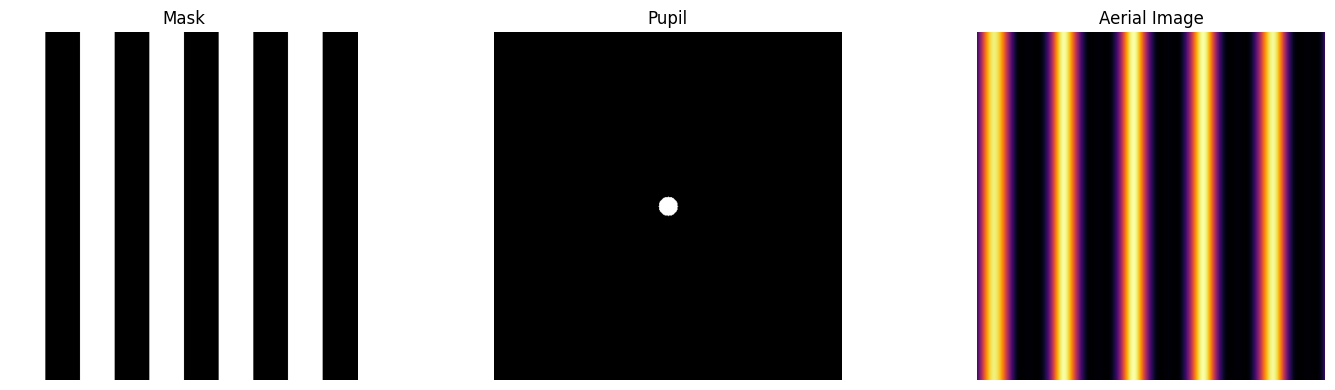

In [10]:
#sanity check
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].imshow(mask)
ax[0].set_title("Mask")
ax[0].axis("off")

ax[1].imshow(np.fft.fftshift(pupil), extent=[np.min(fx), np.max(fx), np.min(fy), np.max(fy)])
ax[1].set_title("Pupil")
ax[1].axis("off")


ax[2].imshow(intensity, cmap="inferno")
ax[2].set_title("Aerial Image")
ax[2].axis("off")

plt.tight_layout()
plt.show()
